# Question 1

This is the set up for question 1, which includes importing all needed libraries and loading in the data to a data frame called df using pandas

In [35]:
# Set-up
import pandas as pd
import re
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.read_csv('facteus_10k_user_panel.csv')

This next part is the solution to part a, and it identifies merchants from merchant_string_example using a method called identify_merchant. The result is stored in a column called identified_merchant. The first few and last rows of the data frame is displayed to show the added row called identify_merchant.

In [36]:
# Isolate variations of merchant strings
def identify_merchant(merchant_string):
    word = 'OTHER'
    if not isinstance(merchant_string, str):
        return word
    if re.search(r'.*MCDONALD.*', merchant_string, re.IGNORECASE):
        word = 'MCDONALDS'
    elif re.search(r'.*(AM[A]?Z[O]?N|PRIME|KINDLE).*', merchant_string, re.IGNORECASE):
        word = 'AMAZON'
    elif re.search(r'.*(APPLE|ITUNES).*', merchant_string, re.IGNORECASE):
        word = 'APPLE'
    return word

df['identified_merchant'] = df['merchant_string_example'].apply(identify_merchant)
df

,account,date,merchant,merchant_string_example,merchant_ticker,merchant_exchange,transactions,spend,spend_min,spend_max,identified_merchant
0,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,AMAZON,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSPUGLV,AMZN,NASDAQ,2,4.72,1.88,2.84,AMAZON
1,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,DUNKIN DONUTS,DUNKIN #308696 Q35 IRVINGTON NJUS0EBSE,DNKN,NASDAQ,1,7.33,7.33,7.33,OTHER
2,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,EXXON MOBIL,EXXONMOBIL 99243909 NEWARK NJUS1JJWD,XOM,NYSE,1,10.02,10.02,10.02,OTHER
3,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,PNC BANK,PNC BANK MAPYJCUN,PNC,NYSE,3,212.44,29.74,102.36,OTHER
4,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-02-01 00:00:00 UTC,AMAZON,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSOA5ML,AMZN,NASDAQ,3,44.04,10.17,20.94,AMAZON
...,...,...,...,...,...,...,...,...,...,...,...
4242940,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,7-ELEVEN,7ELEVEN-FCTI CHAZOZXT,3382,Tokyo Stock Exchange,8,206.00,2.13,60.89,OTHER
4242941,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,AMC THEATRES,AMC CAROLINA PAV #0681 CHARLOTTE NCUSR1YLQ,AMC,NYSE,1,13.70,13.70,13.70,OTHER
4242942,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,ARBYS,ARBYS #5989 CHARLOTTE CHARLOTTE NCUSRAMID,NaN,NaN,1,5.20,5.20,5.20,OTHER
4242943,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,BATH & BODY WORKS,BATH AND BODY WORKS 328PINEVILLE NCUS5CCGT,LB,NYSE,1,67.57,67.57,67.57,OTHER


This next part is the solution to part b, and it identifies city from merchant_string_example using a method called extract_city. This is only possible for the merchant MCDONALDS so the function checks for that. The result is stored in a column called city. The cities found are separated into a data frame called non_nan_cities, which is then displayed.

In [37]:
# Create regex to isolate the city (assuming it's part of merchant_string_example)
state_abbreviations = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
}

def extract_city(merchant_string):
    if not isinstance(merchant_string, str) or not re.search(r'.*MCDONALD.*', merchant_string, re.IGNORECASE): 
        return np.nan
    match = re.search(r"\b([A-Z]+(?:\s+[A-Z]+)+)US", merchant_string)
    if match:
        cityValue = match.group(0)[:-4]  # drop the state (2 letters) and 'US'
        if cityValue.startswith('OF'):  # exception handling for cases where 'OF (2-letter STATE)' appears before city name
            cityValue = cityValue[6:]
        return cityValue
    return np.nan

df['city'] = df['merchant_string_example'].apply(extract_city)
non_nan_cities = df[df['city'].notna()][['merchant', 'city', 'date', 'merchant_string_example']]
print(non_nan_cities)

          merchant           city                     date  \
68       MCDONALDS  IRVINGTON      2018-11-01 00:00:00 UTC   
74       MCDONALDS  IRVINGTON      2018-12-01 00:00:00 UTC   
99       MCDONALDS  NEWARK         2019-04-01 00:00:00 UTC   
146      MCDONALDS  NORWICH        2019-10-01 00:00:00 UTC   
234      MCDONALDS  ORLANDO        2019-01-01 00:00:00 UTC   
...            ...            ...                      ...   
4242855  MCDONALDS  DEER PARK      2020-08-01 00:00:00 UTC   
4242869  MCDONALDS  DEER PARK      2020-09-01 00:00:00 UTC   
4242881  MCDONALDS  DEER PARK      2020-10-01 00:00:00 UTC   
4242892  MCDONALDS  DEER PARK      2020-11-01 00:00:00 UTC   
4242906  MCDONALDS  HOUSTON        2020-12-01 00:00:00 UTC   

                               merchant_string_example  
68       MCDONALD'S F7991       IRVINGTON    NJUSULB4I  
74       MCDONALD'S F7991       IRVINGTON    NJUSVJ31Q  
99       MCDONALD'S F1928       NEWARK       NJUSSCO13  
146      MCDONALD'S F1166  

This next part is the solution to part c, and it removes transaction ID from merchant_string_example using a method called remove_transaction_id. The result is stored in a column called cleaned_merchant_string. The first few and last rows of the data frame is displayed to show the added row called cleaned_merchant_string.

In [38]:
# Remove transaction ID if present (assuming IDs are numeric strings at the end)
def remove_transaction_id(merchant_string):
    if isinstance(merchant_string, str):
        return re.sub(r'#\d+', '', merchant_string)
    return merchant_string

df['cleaned_merchant_string'] = df['merchant_string_example'].apply(remove_transaction_id)
df

,account,date,merchant,merchant_string_example,merchant_ticker,merchant_exchange,transactions,spend,spend_min,spend_max,identified_merchant,city,cleaned_merchant_string
0,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,AMAZON,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSPUGLV,AMZN,NASDAQ,2,4.72,1.88,2.84,AMAZON,NaN,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSPUGLV
1,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,DUNKIN DONUTS,DUNKIN #308696 Q35 IRVINGTON NJUS0EBSE,DNKN,NASDAQ,1,7.33,7.33,7.33,OTHER,NaN,DUNKIN Q35 IRVINGTON NJUS0EBSE
2,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,EXXON MOBIL,EXXONMOBIL 99243909 NEWARK NJUS1JJWD,XOM,NYSE,1,10.02,10.02,10.02,OTHER,NaN,EXXONMOBIL 99243909 NEWARK NJUS1JJWD
3,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,PNC BANK,PNC BANK MAPYJCUN,PNC,NYSE,3,212.44,29.74,102.36,OTHER,NaN,PNC BANK MAPYJCUN
4,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-02-01 00:00:00 UTC,AMAZON,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSOA5ML,AMZN,NASDAQ,3,44.04,10.17,20.94,AMAZON,NaN,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSOA5ML
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242940,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,7-ELEVEN,7ELEVEN-FCTI CHAZOZXT,3382,Tokyo Stock Exchange,8,206.00,2.13,60.89,OTHER,NaN,7ELEVEN-FCTI CHAZOZXT
4242941,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,AMC THEATRES,AMC CAROLINA PAV #0681 CHARLOTTE NCUSR1YLQ,AMC,NYSE,1,13.70,13.70,13.70,OTHER,NaN,AMC CAROLINA PAV CHARLOTTE NCUSR1YLQ
4242942,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,ARBYS,ARBYS #5989 CHARLOTTE CHARLOTTE NCUSRAMID,NaN,NaN,1,5.20,5.20,5.20,OTHER,NaN,ARBYS CHARLOTTE CHARLOTTE NCUSRAMID
4242943,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,BATH & BODY WORKS,BATH AND BODY WORKS 328PINEVILLE NCUS5CCGT,LB,NYSE,1,67.57,67.57,67.57,OTHER,NaN,BATH AND BODY WORKS 328PINEVILLE NCUS5CCGT


A confusion matrix is constructed from a random sample of 200 and displayed.

Confusion Matrix:
 [[6 0 0 0]
 [0 3 0 0]
 [0 0 7 0]
 [0 0 0 0]]


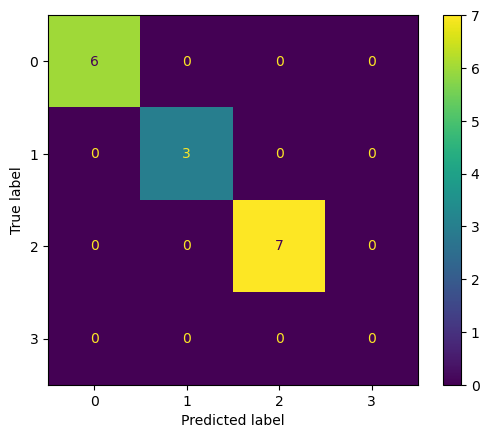

In [39]:
# Sample 200 rows for manual evaluation
sample_df = df.sample(200, random_state=39)

# Construct a confusion matrix to evaluate error rates
true_merchants = sample_df['merchant']
predicted_merchants = sample_df['identified_merchant']
conf_matrix = metrics.confusion_matrix(true_merchants, predicted_merchants, labels = ['MCDONALDS', 'AMAZON', 'APPLE', 'OTHER'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

# Display results
print("Confusion Matrix:\n", conf_matrix)
cm_display.plot()
plt.show()

#### Diagonal Cells (Correct Predictions):
- (0, 0): 6 — Six transactions were correctly classified as MCDONALDS.
- (1, 1): 3 — Three transactions were correctly classified as AMAZON.
- (2, 2): 7 — Seven transactions were correctly classified as APPLE.
- (3, 3): 0 — No transactions were classified as OTHER (and no actual OTHER labels are present in the sampled data).

#### Off-Diagonal Cells (Misclassifications):
- All 0
- No misclassifications

#### Interpretation:
- This confusion matrix shows perfect accuracy for the classes MCDONALDS, AMAZON, and APPLE in the sampled data.
- The OTHER class has no entries, either as true labels or predictions.

A confusion matrix is constructed from the values outside of the sample and displayed.

Confusion Matrix:
 [[166550      0      0      0]
 [     0 115281      0      0]
 [     0      0 105467      0]
 [     0      0      0      0]]


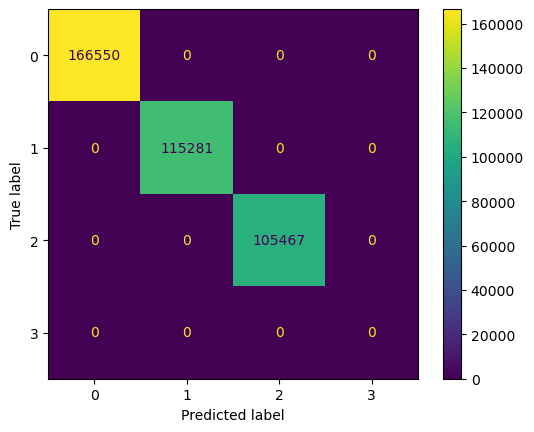

In [40]:
# Test the regular expression on the rest of the data to minimize false positives
# Calculate false positive rate
test_df = df[~df.index.isin(sample_df.index)]  # Exclude sampled rows

test_true_merchants = test_df['merchant']
test_predicted_merchants = test_df['identified_merchant']

test_conf_matrix = metrics.confusion_matrix(test_true_merchants, test_predicted_merchants, labels = ['MCDONALDS', 'AMAZON', 'APPLE', 'OTHER'])
test_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_conf_matrix)

# Display results
print("Confusion Matrix:\n", test_conf_matrix)
test_cm_display.plot()
plt.show()

#### Diagonal Cells (Correct Predictions):
- (0, 0): 166550 — Six transactions were correctly classified as MCDONALDS.
- (1, 1): 115281 — Five transactions were correctly classified as AMAZON.
- (2, 2): 105467 — Four transactions were correctly classified as APPLE.
- (3, 3): 0 — No transactions were classified as OTHER (and no actual OTHER labels are present in the sampled data).

#### Off-Diagonal Cells (Misclassifications):
- All 0
- No misclassifications

#### Interpretation:
- This confusion matrix shows perfect accuracy for the classes MCDONALDS, AMAZON, and APPLE in the test data.
- The OTHER class has no entries, either as true labels or predictions.

# Debug

This code was used to check misclassified information until it resulted in none so no rows should be printed.

In [41]:
labels = ['MCDONALDS', 'AMAZON', 'APPLE', 'OTHER']
misclassified_df = test_df[test_df['merchant'] != test_df['identified_merchant']]
misclassified_df = misclassified_df[
    (misclassified_df['merchant'] == 'MCDONALDS') |
    (misclassified_df['merchant'] == 'AMAZON') |
    (misclassified_df['merchant'] == 'APPLE')
]
misclassified_df

,account,date,merchant,merchant_string_example,merchant_ticker,merchant_exchange,transactions,spend,spend_min,spend_max,identified_merchant,city,cleaned_merchant_string


In [42]:
# Set-up
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Repeated from Question 1
df = pd.read_csv('facteus_10k_user_panel.csv')

The data is filtered to a select 10 merchants, then it is preprocessed to remove non-alphanumeric characters and convert to lowercase. Then using CountVectorizer, the code creates a vector space representation where 1-grams, 2-grams, and 3-grams are generated without stop word removal. A TfidfVectorizer is then applied to convert the merchant text into a TF-IDF weighted vector space, capturing the importance of each term based on frequency. The vector space is filtered to exclude n-grams appearing in fewer than 3% of documents, improving focus on more common patterns. A logistic regression model, trained using a one-vs-rest approach, is applied to predict merchant categories. The data is split into training and test sets, with the logistic regression model fitting on the training data to classify the merchant names.

In [43]:
# Filter in on a select list of merchants
filtered_df = df[df['merchant'].str.upper().isin([
    'WALMART', 'MCDONALDS', 'AMAZON', 'APPLE', 
    'SHELL', 'WENDYS', 'TACO BELL', 'BURGER KING', 
    'DOLLAR GENERAL', 'ACE HARDWARE'
])]

#  Create a  1-3 gram vector space using no stemming from , no stop words and a word tokenizer with default settings
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    return text.lower()

# Apply preprocessing to the 'merchant_string_example' column
filtered_df = filtered_df.copy()  # Ensures we're working with a copy to avoid the warning
filtered_df.loc[:, 'merchant_string_clean'] = filtered_df['merchant'].apply(preprocess_text)

vectorizer = CountVectorizer(ngram_range=(1, 3)) # Creates 1-gram, 2-gram, and 3-gram features

# Fit and transform the filtered data to create the vector space matrix
X_counts = vectorizer.fit_transform(filtered_df['merchant_string_clean'])

#  Create a vector space matrix matrix from the above using countvectorizer and TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Fit and transform the data with TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(filtered_df['merchant_string_clean'])

# Remove ngrams which occur in less than ~3% of the strings
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    min_df=0.03    # Excludes terms appearing in fewer than 3% of documents
)

X_tfidf_filtered = vectorizer.fit_transform(filtered_df['merchant_string_clean'])

# Using the above matrix and a multi-label classification predictive model
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_filtered, filtered_df['merchant_string_clean'], test_size=0.2)

# Train the logistic regression model
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In this part, the code performs a 10-fold cross-validation on the trained logistic regression model to evaluate its performance across different data splits. This approach helps validate the model’s generalizability. The output shows cross-validation scores of 1.0 for each fold, indicating perfect classification accuracy in all 10 subsets of the data, suggesting an exceptionally well-fitted model.

In [44]:
# Construct the model leaving some data out (10 fold xval or a 20% random sample)
# Perform 10-fold cross-validation
scores = cross_val_score(model, X_tfidf_filtered, filtered_df['merchant_string_clean'], cv=10)
print(f'Cross-Validation Scores: {scores}')

Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Here, the model's performance is tested on an out-of-sample dataset (the test set). The classification_report function generates detailed metrics, including precision, recall, and F1-score for each merchant category. The output reveals a perfect score of 1.0 across all metrics for each category, confirming that the model classifies all merchant names correctly in the test set as well.

In [45]:
#  Evaluate your model on out-of-sample data and show out-of-sample error for each of the 10 merchants
# Predict on the test set
y_pred = model.predict(X_test)

# Show evaluation metrics
print(classification_report(y_test, y_pred, target_names=filtered_df['merchant_string_clean'].unique()))

                precision    recall  f1-score   support

        amazon       1.00      1.00      1.00       322
         apple       1.00      1.00      1.00     22965
dollar general       1.00      1.00      1.00     21182
         shell       1.00      1.00      1.00     13755
     mcdonalds       1.00      1.00      1.00     12701
       walmart       1.00      1.00      1.00     33397
     taco bell       1.00      1.00      1.00     17680
        wendys       1.00      1.00      1.00     13693
   burger king       1.00      1.00      1.00     37193
  ace hardware       1.00      1.00      1.00     14516

      accuracy                           1.00    187404
     macro avg       1.00      1.00      1.00    187404
  weighted avg       1.00      1.00      1.00    187404



In [46]:
# Set-up
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d

df = pd.read_csv('facteus_10k_user_panel.csv')

This is the set up continued. This is repeated because a random sample of 500 rows is used for the next steps since there is not enough memory to proceed on all of the data.

In [47]:
# Previous Steps to Obtain Matrix 
# Filter in on a select list of merchants
filtered_df = df[df['merchant'].str.upper().isin([
    'WALMART', 'MCDONALDS', 'AMAZON', 'APPLE', 
    'SHELL', 'WENDYS', 'TACO BELL', 'BURGER KING', 
    'DOLLAR GENERAL', 'ACE HARDWARE'
])]

# Create a  1-3 gram vector space using no stemming from , no stop words and a word tokenizer with default settings
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    return text.lower()

# Apply preprocessing to the 'merchant_string_example' column
# Only change is that the filtered_df is a sample of 500 rows
filtered_df = filtered_df.sample(500, random_state=42)  # Ensures we're working with a copy to avoid the warning
filtered_df.loc[:, 'merchant_string_clean'] = filtered_df['merchant'].apply(preprocess_text)

vectorizer = CountVectorizer(ngram_range=(1, 3)) # Creates 1-gram, 2-gram, and 3-gram features

# Fit and transform the filtered data to create the vector space matrix
X_counts = vectorizer.fit_transform(filtered_df['merchant_string_clean'])

# Create a vector space matrix matrix from the above using countvectorizer and TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Fit and transform the data with TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(filtered_df['merchant_string_clean'])

#  Remove ngrams which occur in less than ~3% of the strings
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    min_df=0.03    # Excludes terms appearing in fewer than 3% of documents
)

X_tfidf_filtered = vectorizer.fit_transform(filtered_df['merchant_string_clean'])

This next part reduces the dimensionality to 2 using t-SNE, and then the data is plotted on a scatter plot.

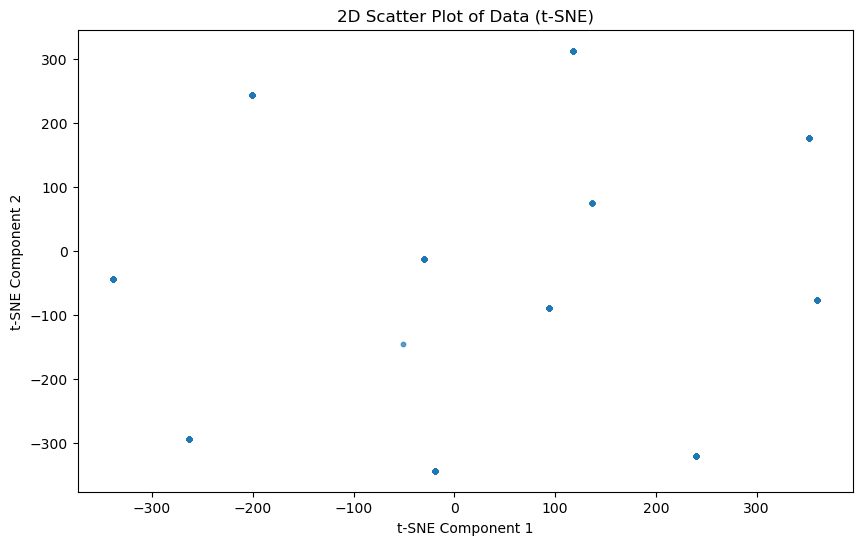

In [48]:
#  Reduce the dimensionality to 2D
# Normalize the data
X_normalized = StandardScaler().fit_transform(X_tfidf_filtered.toarray())

# Apply t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X_normalized)

#  Draw a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=10, alpha=0.7)
plt.title("2D Scatter Plot of Data (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

This next part clusters the data using K-means with a value of 10 for k. Then the data is plotted using a Voronoi Diagram with the actual merchant names colored in.

/Users/srujithareddyambati/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


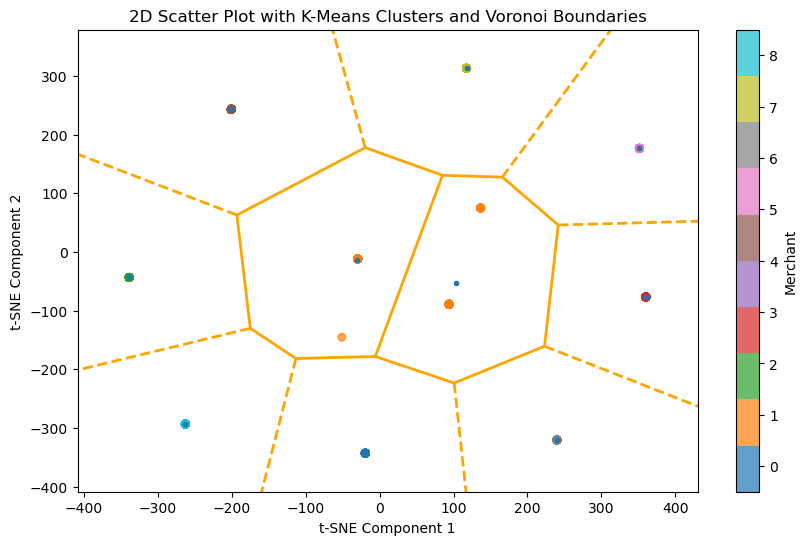

In [49]:
#  Cluster the data using K-means with k=10 and plot Voronoi Diagram using scipy and matplotlib
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_2d)
centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))

#  Scatter plot of the data points, colored by real merchant names
merchant_names = filtered_df['merchant'].unique()
merchant_colors = {merchant: i for i, merchant in enumerate(merchant_names)}
colored_labels = filtered_df['merchant'].map(merchant_colors)
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colored_labels, cmap='tab10', s=30, alpha=0.7)
plt.colorbar(scatter, ticks=range(len(merchant_names)), label='Merchant')
plt.clim(-0.5, len(merchant_names) - 0.5)

# Generate and plot Voronoi diagram based on K-means centers
vor = Voronoi(centers)
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2)

plt.title("2D Scatter Plot with K-Means Clusters and Voronoi Boundaries")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [50]:
import pandas as pd
pd.set_option('display.max_rows', 100)

In [51]:
# Load the datasets
data = pd.read_csv('facteus_10k_user_panel.csv', parse_dates=['date'])
fiscal_calendar = pd.read_csv('fiscal_calander.csv', parse_dates=['PERIOD_START_DATE', 'PERIOD_END_DATE'])

The code adjusts fiscal quarter start and end dates to align with month boundaries and splits company_id2 into company_exchange and company_ticker for further analysis.

In [52]:
fiscal_quarters = fiscal_calendar[fiscal_calendar['PERIOD_TYPE'] == 'fiscal_quarter'].copy()

def round_to_month_boundary(date):
    month_start = date.replace(day=1)  # First day of the current month
    month_end = (date + pd.offsets.MonthEnd(0))  # End of the current month
    new_date = month_start if abs((date - month_start).days) <= abs((month_end - date).days) else month_end
    return new_date

def adjust_dates_updated(start_date, end_date):
    # Move PERIOD_START_DATE up a day if it's not the first of the month
    if start_date.day != 1:
        start_date += pd.Timedelta(days=1)
    # Move PERIOD_END_DATE down a day if it's the first of the month
    if end_date.day == 1:
        end_date -= pd.Timedelta(days=1)
    return start_date, end_date


# Apply the rounding function to PERIOD_START_DATE and PERIOD_END_DATE
fiscal_quarters['PERIOD_START_DATE'] = fiscal_quarters['PERIOD_START_DATE'].apply(round_to_month_boundary)
fiscal_quarters['PERIOD_END_DATE'] = fiscal_quarters['PERIOD_END_DATE'].apply(round_to_month_boundary)
# Apply the updated adjustments
fiscal_quarters[['PERIOD_START_DATE', 'PERIOD_END_DATE']] = fiscal_quarters.apply(
    lambda row: adjust_dates_updated(row['PERIOD_START_DATE'], row['PERIOD_END_DATE']), axis=1, result_type='expand'
)
fiscal_quarters[['company_exchange', 'company_ticker']] = fiscal_quarters['company_id2'].str.split(':', expand=True)

The code aligns transaction data with fiscal periods by converting and sorting dates, then merging data and fiscal_quarters on date and ticker information to associate transactions with relevant fiscal periods. Then the data is displayed.

In [53]:
data['date'] = pd.to_datetime(data['date']).dt.tz_localize(None)
fiscal_quarters['PERIOD_START_DATE'] = pd.to_datetime(fiscal_quarters['PERIOD_START_DATE']).dt.tz_localize(None)
fiscal_quarters['PERIOD_END_DATE'] = pd.to_datetime(fiscal_quarters['PERIOD_END_DATE']).dt.tz_localize(None)

data = data.sort_values(['date', 'merchant_ticker'])
fiscal_quarters = fiscal_quarters.sort_values(['PERIOD_START_DATE', 'company_ticker'])

df = pd.merge_asof(data, fiscal_quarters, left_on='date', left_by='merchant_ticker', right_on='PERIOD_START_DATE', right_by='company_ticker', direction='backward')

data_fiscal = df[~df['PERIOD_START_DATE'].isna()]

data_fiscal

,account,date,merchant,merchant_string_example,merchant_ticker,merchant_exchange,transactions,spend,spend_min,spend_max,PERIOD_NAME,PERIOD_TYPE,PERIOD_START_DATE,PERIOD_END_DATE,company_id1,company_id2,PERIOD_NAME_STANDARDIZED,company_exchange,company_ticker
1,a04:512:006092FAB17D5C557EE255C8AF7AE203,2018-01-01,7-ELEVEN,7-ELEVEN CHICAGO ILBKHGZ,3382,Tokyo Stock Exchange,1,3.94,3.94,3.94,Q4-2018,fiscal_quarter,2017-12-01,2018-02-28,3382 JP,T:3382,2018-4Q,T,3382
2,a04:512:00A893AE815F765DBC73FC245568E7AA,2018-01-01,7-ELEVEN,7-ELEVEN PIEDMONT SCY2M4C,3382,Tokyo Stock Exchange,1,15.18,15.18,15.18,Q4-2018,fiscal_quarter,2017-12-01,2018-02-28,3382 JP,T:3382,2018-4Q,T,3382
3,a04:512:00E3CF85AD304C4CCF3834CE1E24EECC,2018-01-01,7-ELEVEN,7-ELEVEN WASHINGTON DCCFQPL,3382,Tokyo Stock Exchange,1,9.22,9.22,9.22,Q4-2018,fiscal_quarter,2017-12-01,2018-02-28,3382 JP,T:3382,2018-4Q,T,3382
4,a04:512:014E528013A2B703DE4CCE9B401FBE17,2018-01-01,7-ELEVEN,7-ELEVEN VIRGINIA BEAC VAZMIKG,3382,Tokyo Stock Exchange,7,47.67,1.61,12.79,Q4-2018,fiscal_quarter,2017-12-01,2018-02-28,3382 JP,T:3382,2018-4Q,T,3382
5,a04:512:0179B32AB6E896FB71605812ED509497,2018-01-01,7-ELEVEN,7-ELEVEN CHEEKTOWAGA NYQ1JO4,3382,Tokyo Stock Exchange,1,5.33,5.33,5.33,Q4-2018,fiscal_quarter,2017-12-01,2018-02-28,3382 JP,T:3382,2018-4Q,T,3382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220139,a04:512:CB3B6EC3AAF2956FA56DDEEE642CF09D,2020-12-01,ZYNGA,GOOGLE* ZYNGA INC 650-2530000 CAUSHIWTD,ZNGA,NASDAQ,7,48.90,4.98,10.00,Q4-2020,fiscal_quarter,2020-10-01,2020-12-31,ZNGA US,NASDAQ:ZNGA,2020-4Q,NASDAQ,ZNGA
4220140,a04:512:51199146A5EA9C9A8CB31B0C39F857E7,2020-12-01,ZYNGA,GOOGLE *ZYNGA INC G.CO/HELPPAY#CAUSWHXE2,ZNGA,NASDAQ,7,89.89,4.98,19.99,Q4-2020,fiscal_quarter,2020-10-01,2020-12-31,ZNGA US,NASDAQ:ZNGA,2020-4Q,NASDAQ,ZNGA
4220141,a04:512:D7E569AA76F1B66BD59A060DA126E2ED,2020-12-01,ZYNGA,GOOGLE*ZYNGA INC INTERNET CAUSEQPUO,ZNGA,NASDAQ,1,2.11,2.11,2.11,Q4-2020,fiscal_quarter,2020-10-01,2020-12-31,ZNGA US,NASDAQ:ZNGA,2020-4Q,NASDAQ,ZNGA
4220142,a04:512:D9F5606D457DA2FF690975AF3B0537F5,2020-12-01,ZYNGA,GOOGLE *ZYNGA INC 855-836-3987 CAUSLDMAC,ZNGA,NASDAQ,1,10.69,10.69,10.69,Q4-2020,fiscal_quarter,2020-10-01,2020-12-31,ZNGA US,NASDAQ:ZNGA,2020-4Q,NASDAQ,ZNGA


The code loads a CSV file containing revenue and KPI data into a DataFrame, converts all column names to lowercase for consistency. This code merges the data_fiscal dataset with the revenue dataset on the standardized fiscal quarter (PERIOD_NAME_STANDARDIZED in data_fiscal) and merchant_ticker, using an inner join to retain only rows with matching fiscal quarter and merchant ticker in both datasets, resulting in the data_fiscal_revenue DataFrame. We then save the data_fiscal_revenue back to the data Dataframe and display

In [54]:
revenue = pd.read_csv('revenues_kpis.csv')
revenue.columns = revenue.columns.str.lower()

data_fiscal_revenue = pd.merge(
    data_fiscal,
    revenue[['fiscal_quarter', 'merchant_ticker', 'kpivalue']],
    left_on=['PERIOD_NAME_STANDARDIZED', 'merchant_ticker'],
    right_on=['fiscal_quarter', 'merchant_ticker'],
    how='inner'
)

data_fiscal_revenue.columns

data = data_fiscal_revenue[['account', 'date', 'merchant', 'merchant_string_example',
       'merchant_ticker', 'merchant_exchange', 'transactions', 'spend',
       'spend_min', 'spend_max',
       'PERIOD_NAME_STANDARDIZED',
       'fiscal_quarter', 'kpivalue']]

data

,account,date,merchant,merchant_string_example,merchant_ticker,merchant_exchange,transactions,spend,spend_min,spend_max,PERIOD_NAME_STANDARDIZED,fiscal_quarter,kpivalue
0,a04:512:006092FAB17D5C557EE255C8AF7AE203,2018-01-01,7-ELEVEN,7-ELEVEN CHICAGO ILBKHGZ,3382,Tokyo Stock Exchange,1,3.94,3.94,3.94,2018-4Q,2018-4Q,14603.24289
1,a04:512:00A893AE815F765DBC73FC245568E7AA,2018-01-01,7-ELEVEN,7-ELEVEN PIEDMONT SCY2M4C,3382,Tokyo Stock Exchange,1,15.18,15.18,15.18,2018-4Q,2018-4Q,14603.24289
2,a04:512:00E3CF85AD304C4CCF3834CE1E24EECC,2018-01-01,7-ELEVEN,7-ELEVEN WASHINGTON DCCFQPL,3382,Tokyo Stock Exchange,1,9.22,9.22,9.22,2018-4Q,2018-4Q,14603.24289
3,a04:512:014E528013A2B703DE4CCE9B401FBE17,2018-01-01,7-ELEVEN,7-ELEVEN VIRGINIA BEAC VAZMIKG,3382,Tokyo Stock Exchange,7,47.67,1.61,12.79,2018-4Q,2018-4Q,14603.24289
4,a04:512:0179B32AB6E896FB71605812ED509497,2018-01-01,7-ELEVEN,7-ELEVEN CHEEKTOWAGA NYQ1JO4,3382,Tokyo Stock Exchange,1,5.33,5.33,5.33,2018-4Q,2018-4Q,14603.24289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890491,a04:512:E4B8F66145E06E8B304AE87401A37739,2020-12-01,WALGREENS,WALGREENS STORE 444 BROALBANY NYUS144EY,WBA,NASDAQ,1,2.63,2.63,2.63,2021-2Q,2021-2Q,32779.00000
2890492,a04:512:E4ECE5FC587409D6D9752372C7416CE7,2020-12-01,WALGREENS,WALGREENS STORE 2480 E WEST BRANCH MIUSQFLZV,WBA,NASDAQ,2,91.90,42.59,49.31,2021-2Q,2021-2Q,32779.00000
2890493,a04:512:E50E8246B20054B43B95EA99A66F965E,2020-12-01,WALGREENS,WALGREENS STORE 757 N MCHICAGO ILUSVZ1AB,WBA,NASDAQ,3,29.50,6.06,13.53,2021-2Q,2021-2Q,32779.00000
2890494,a04:512:E5E927C42F7961EEB52F774627E913A9,2020-12-01,WALGREENS,WALGREENS #4246 513-347-3359 OHUSJVTCV,WBA,NASDAQ,1,20.05,20.05,20.05,2021-2Q,2021-2Q,32779.00000


In [55]:
#### Correlation coefficients and line plots

   merchant_ticker  correlation
0             3382     0.937341
1             AAPL     0.682103
2             AMZN     0.921633
3             DLTR     0.940783
4               KR     0.981144
5              MCD     0.667202
6              PNC     0.809306
7               SQ     0.995937
8                T     0.759440
9              TGT     0.791822
10            TMUS     0.975143
11            UBER     0.456125
12             USB     0.839467
13              VZ     0.924562
14             WMT     0.946482


/var/folders/gr/wcm2f9z53x5290x9dmhnhjkh0000gn/T/ipykernel_49929/980517416.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15_data['normalized_spend'] = top_15_data.groupby('merchant_ticker')['spend'].transform(
/var/folders/gr/wcm2f9z53x5290x9dmhnhjkh0000gn/T/ipykernel_49929/980517416.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15_data['normalized_kpivalue'] = top_15_data.groupby('merchant_ticker')['kpivalue'].transform(


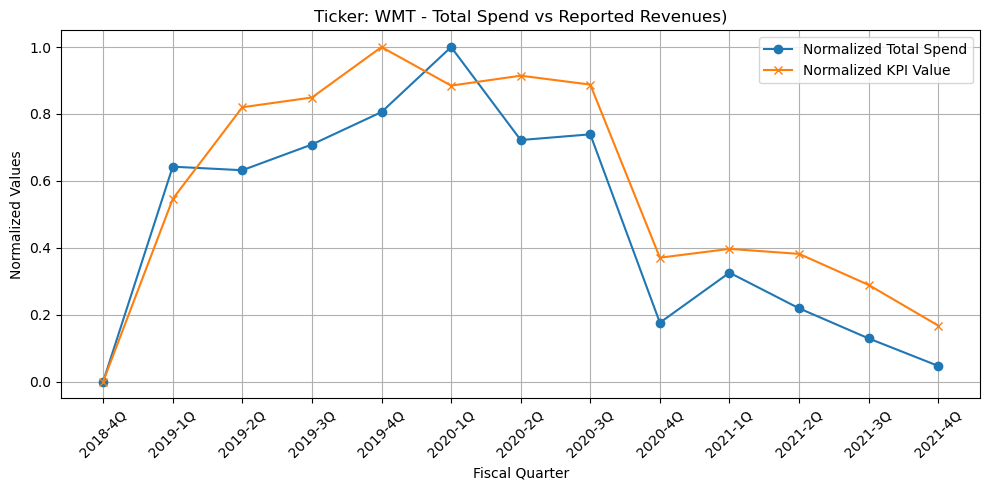

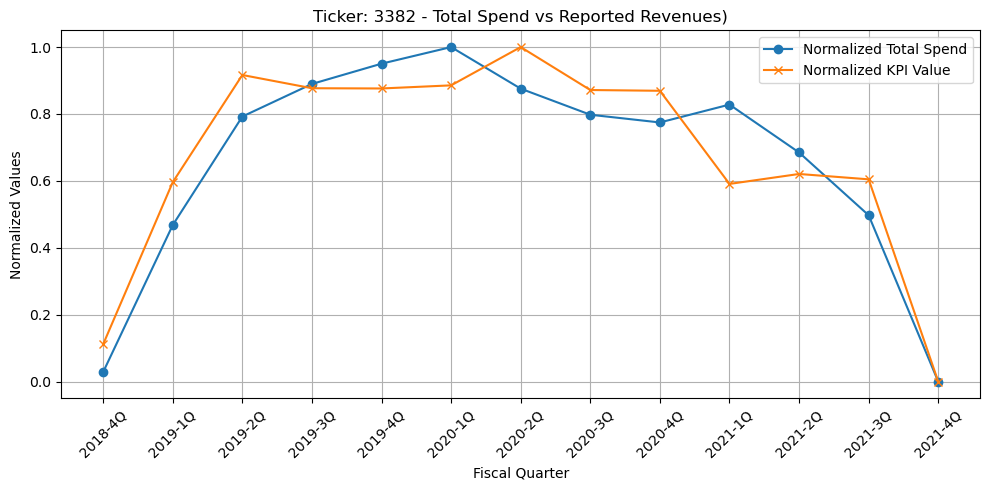

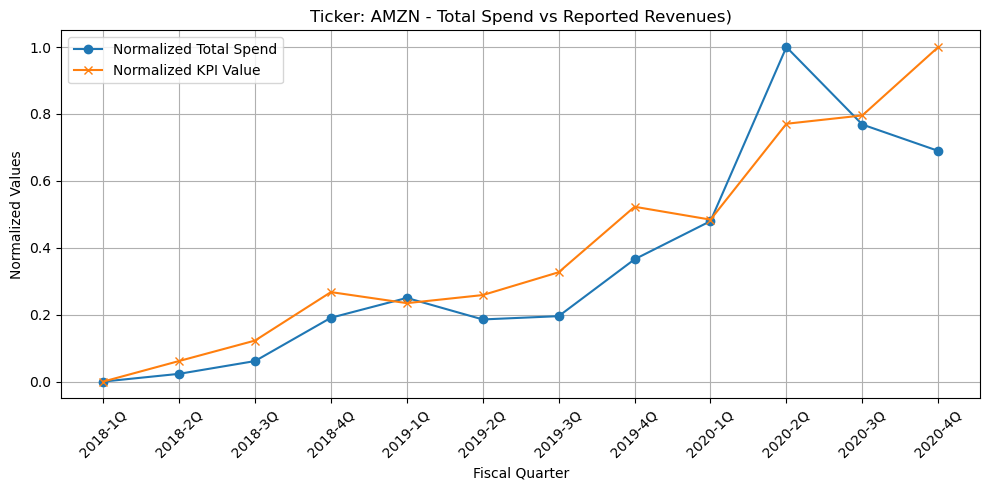

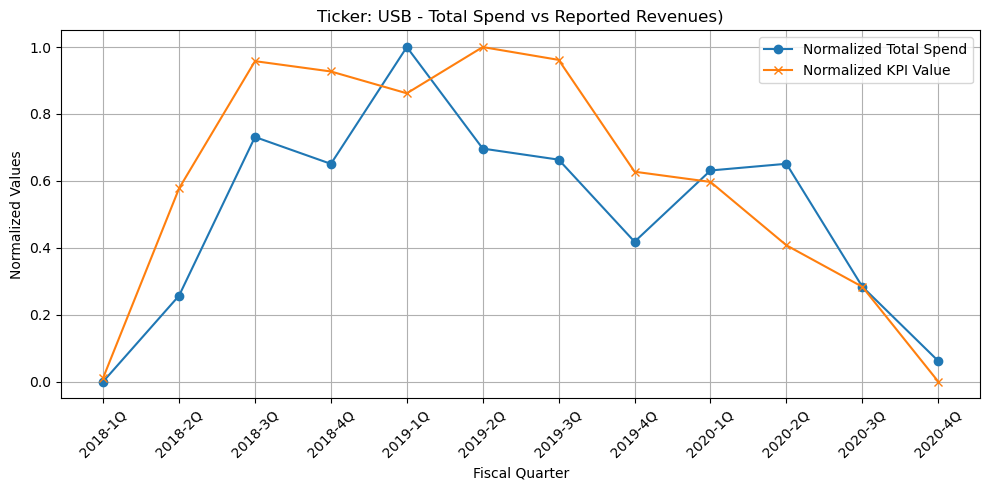

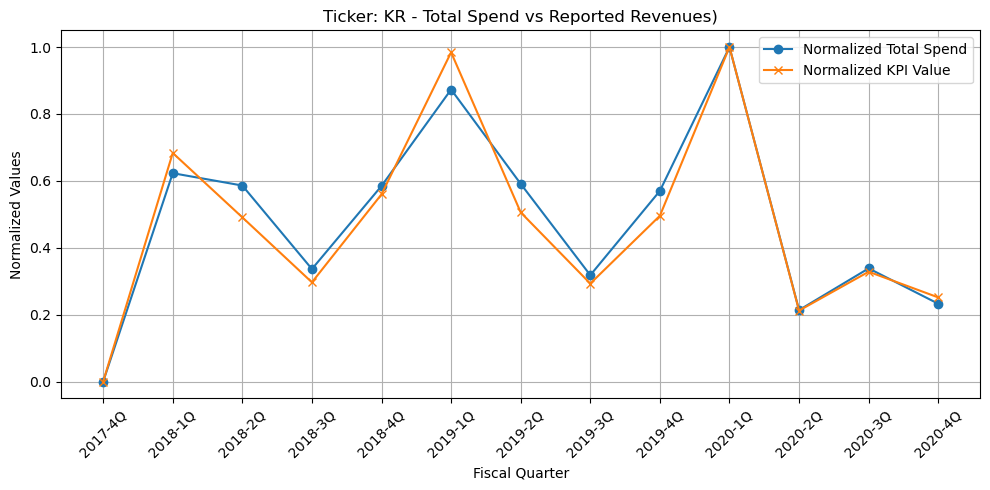

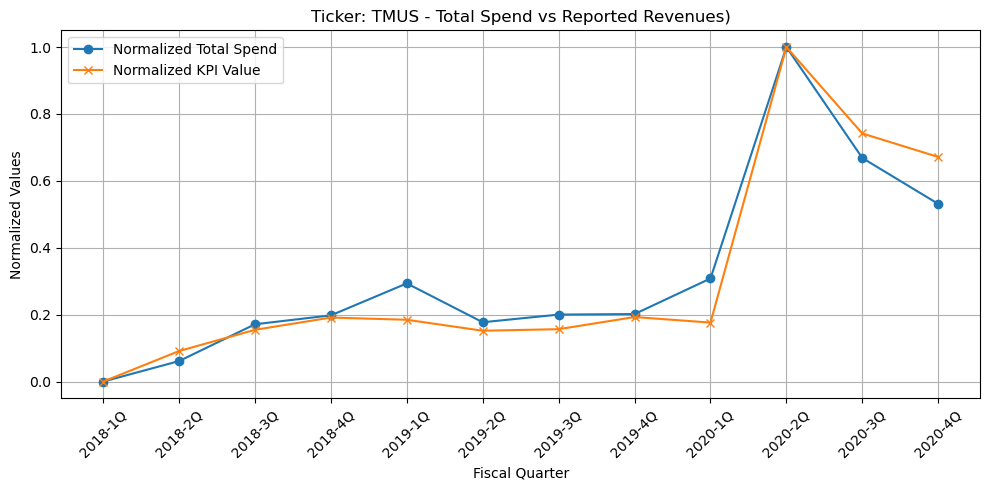

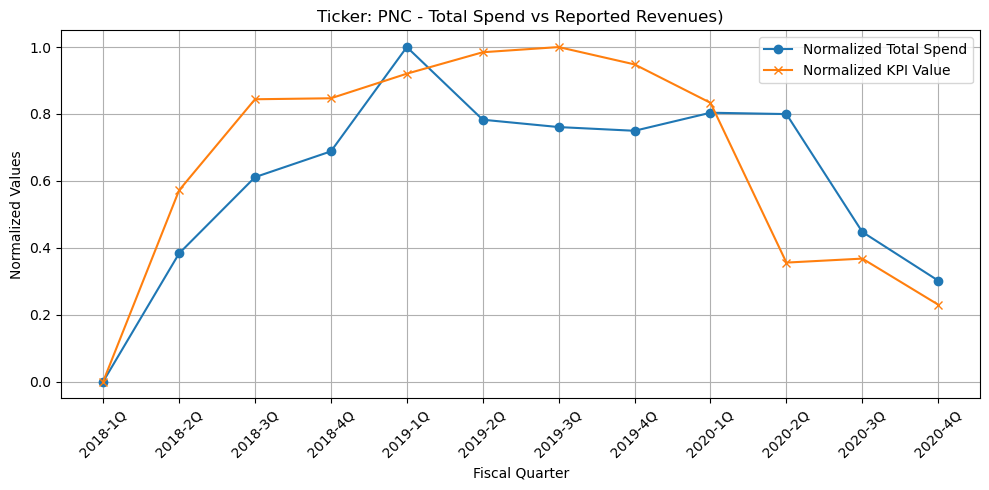

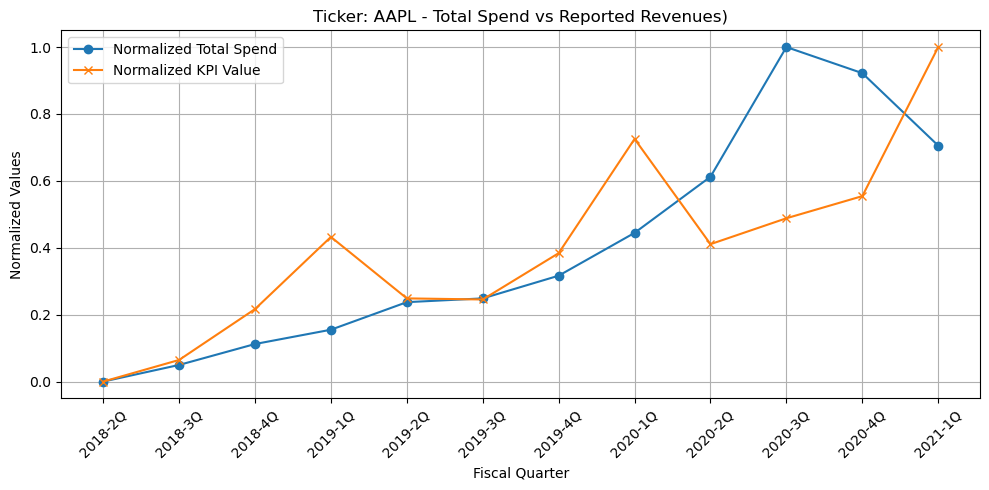

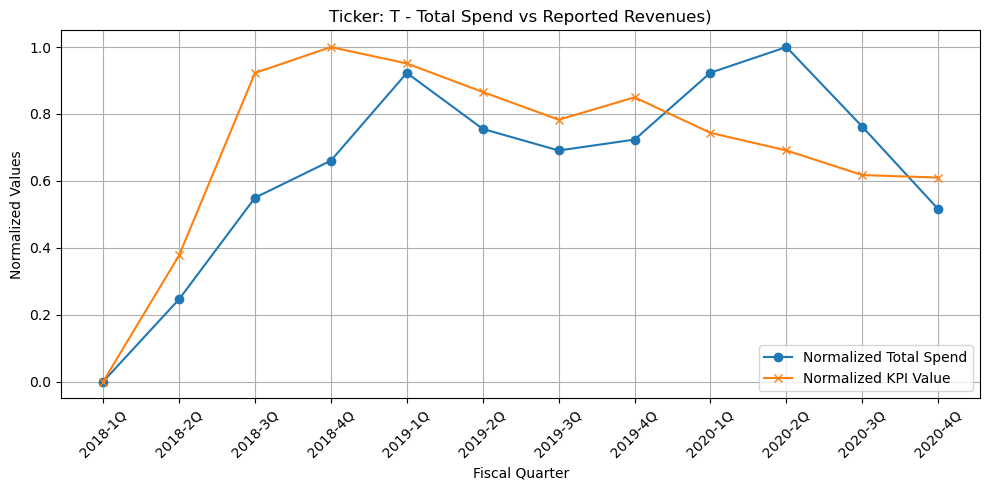

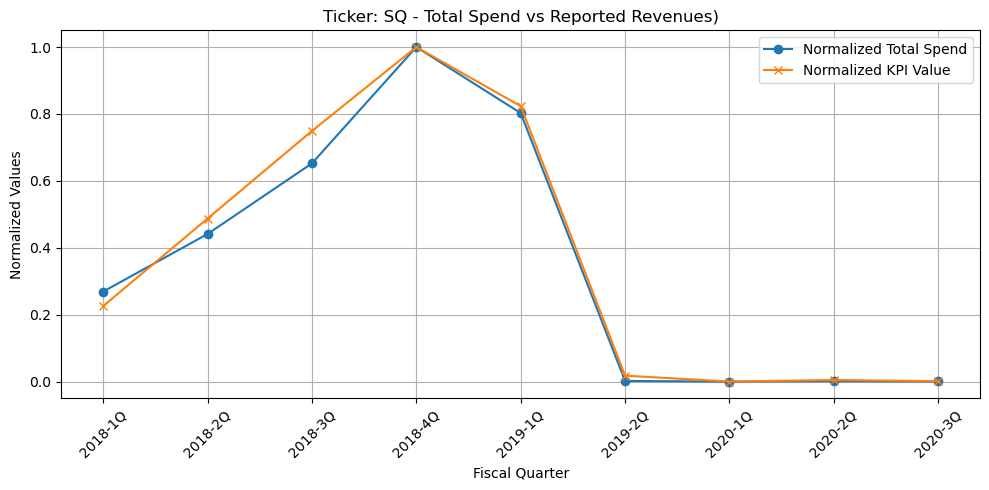

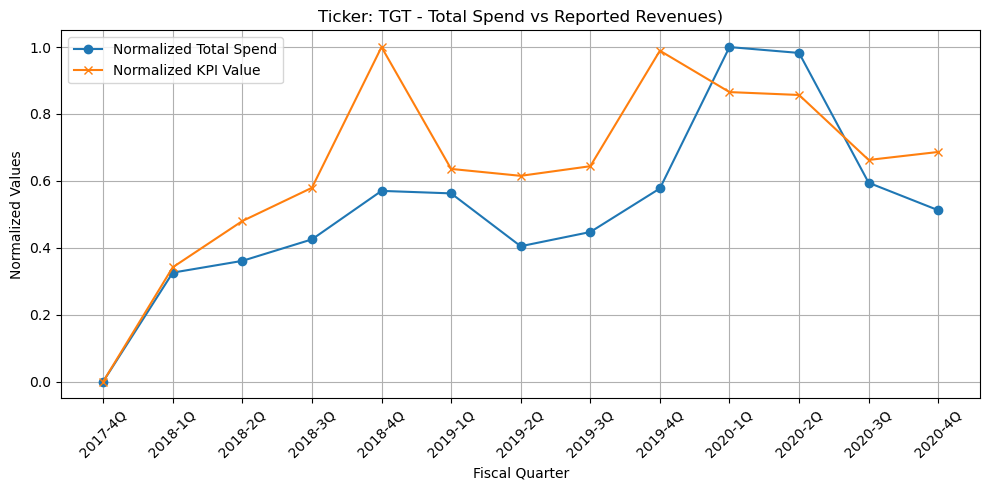

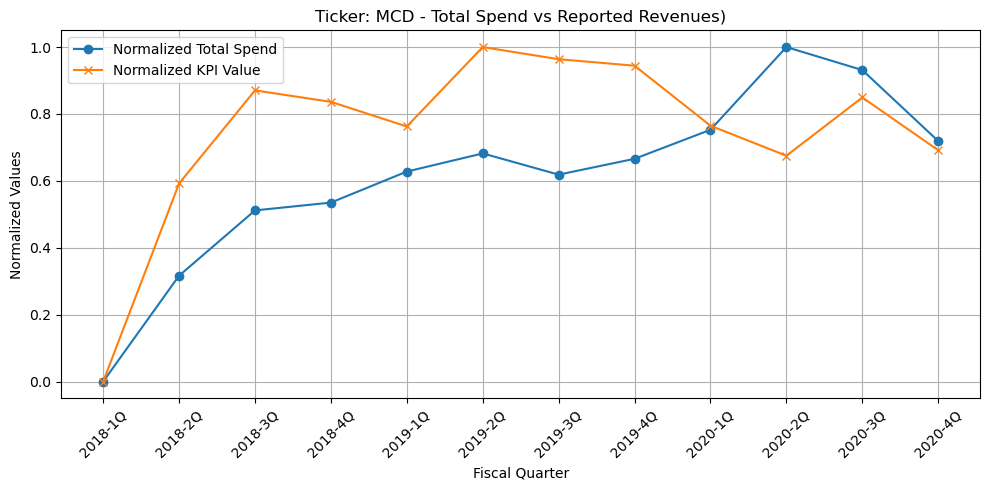

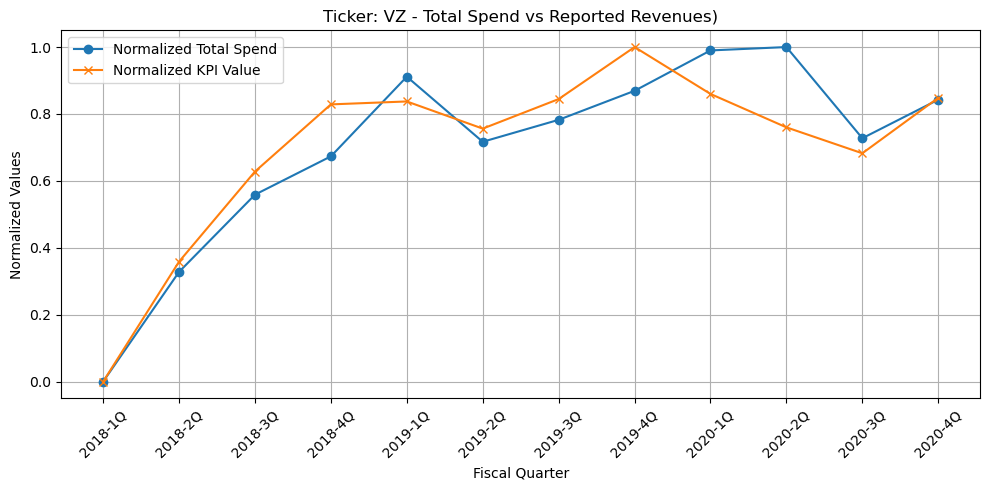

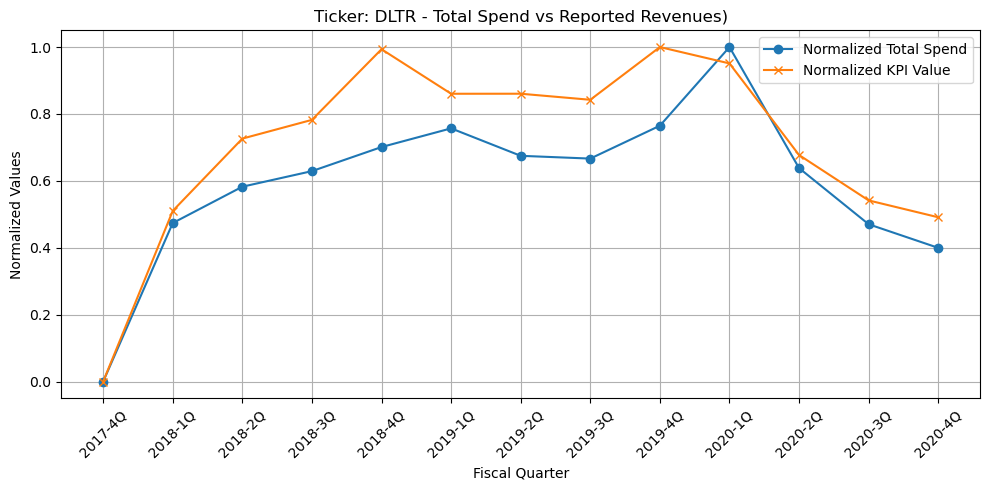

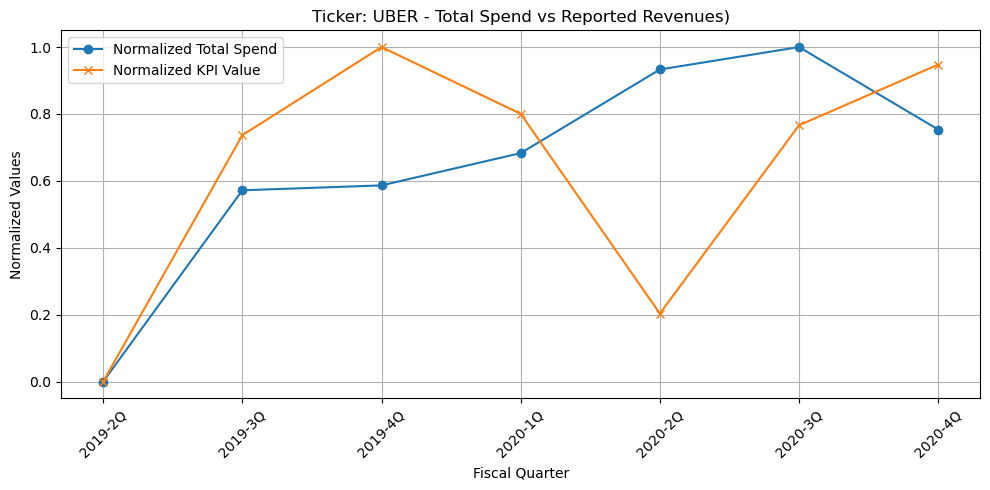

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Aggregate total spend and reported revenues at the ticker level per quarter
ticker_quarter_data = data_fiscal_revenue.groupby(['fiscal_quarter', 'merchant_ticker']).agg({
    'transactions': 'sum',
    'spend': 'sum',
    'kpivalue': 'sum'  
}).reset_index()

#  Find the top 15 companies by total spend
top_15_tickers = (
    ticker_quarter_data.groupby('merchant_ticker')['spend']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# Filter data for only the top 15 tickers
top_15_data = ticker_quarter_data[ticker_quarter_data['merchant_ticker'].isin(top_15_tickers)]

# Normalize spend and kpivalue data
top_15_data['normalized_spend'] = top_15_data.groupby('merchant_ticker')['spend'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)
top_15_data['normalized_kpivalue'] = top_15_data.groupby('merchant_ticker')['kpivalue'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Calculate correlation coefficient for each ticker
correlation_results = (
    top_15_data.groupby('merchant_ticker')
    .apply(lambda x: np.corrcoef(x['spend'], x['kpivalue'])[0, 1])
    .reset_index(name='correlation')
)

# Print correlation coefficients
print(correlation_results)

#  Plot 15 line graphs
for ticker in top_15_tickers:
    ticker_data = top_15_data[top_15_data['merchant_ticker'] == ticker]
    plt.figure(figsize=(10, 5))
    plt.plot(
        ticker_data['fiscal_quarter'],
        ticker_data['normalized_spend'],
        label='Normalized Total Spend',
        marker='o'
    )
    plt.plot(
        ticker_data['fiscal_quarter'],
        ticker_data['normalized_kpivalue'],
        label='Normalized KPI Value',
        marker='x'
    )
    plt.title(f"Ticker: {ticker} - Total Spend vs Reported Revenues)")
    plt.xlabel("Fiscal Quarter")
    plt.ylabel("Normalized Values")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




https://stock.walmart.com/financials/quarterly-results/default.aspx

We went to press release to see segment revenue for the segments we want are Walmart US and Sams Club, which is the walmart_revenues data that I manually entered. The code processes transaction and revenue data by standardizing fiscal quarters, filtering invalid entries, aggregating total spend per quarter, and merging it with Walmart's sales data to create a comparative dataset (comparison_data).

In [57]:
# Manually input Walmart US and Sam's Club segment revenues for fiscal 2020
# Example data (replace with actual values from Walmart's quarterly reports)
walmart_revenues = pd.DataFrame({
    'fiscal_quarter': ['2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4'],
    'walmart_us_sales': [80.3, 85.2, 83.2, 92.3],  # in billion dollars
    'sams_club_sales': [28.8, 29.1, 29.2, 15.3]  # in billion dollars
})
walmart_revenues['total_sales'] = walmart_revenues['walmart_us_sales'] + walmart_revenues['sams_club_sales']

# Standardize 'PERIOD_NAME_STANDARDIZED' to match 'fiscal_quarter'
data_fiscal['PERIOD_NAME_STANDARDIZED'] = data_fiscal['PERIOD_NAME_STANDARDIZED'].str.replace(
    r'(\d{4})-(\d)Q', r'\1-Q\2', regex=True
)

# Remove invalid entries (e.g., '-2019-4Q' or '-2021-1Q')
data_fiscal = data_fiscal[~data_fiscal['PERIOD_NAME_STANDARDIZED'].str.startswith('-')]


#  Merge with fiscal quarter mapping from Part 1
mapped_data = pd.merge(
    data_fiscal,
    walmart_revenues,
    left_on='PERIOD_NAME_STANDARDIZED',
    right_on='fiscal_quarter',
    how='inner'
)

#  Aggregate total spend per fiscal quarter
total_spend = mapped_data.groupby('PERIOD_NAME_STANDARDIZED')['spend'].sum().reset_index()
total_spend.rename(columns={'spend': 'total_spend'}, inplace=True)

#  Merge spend data with Walmart revenue data
comparison_data = pd.merge(
    total_spend,
    walmart_revenues[['fiscal_quarter', 'total_sales']],
    left_on='PERIOD_NAME_STANDARDIZED',
    right_on='fiscal_quarter',
    how='inner'
)

comparison_data

/var/folders/gr/wcm2f9z53x5290x9dmhnhjkh0000gn/T/ipykernel_49929/2544932929.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fiscal['PERIOD_NAME_STANDARDIZED'] = data_fiscal['PERIOD_NAME_STANDARDIZED'].str.replace(


,PERIOD_NAME_STANDARDIZED,total_spend,fiscal_quarter,total_sales
0,2020-Q1,22843735.89,2020-Q1,109.1
1,2020-Q2,22704742.94,2020-Q2,114.3
2,2020-Q3,21542541.65,2020-Q3,112.4
3,2020-Q4,19787895.79,2020-Q4,107.6


#Plotting two axes plot as the scales of total spend and total sales are different 

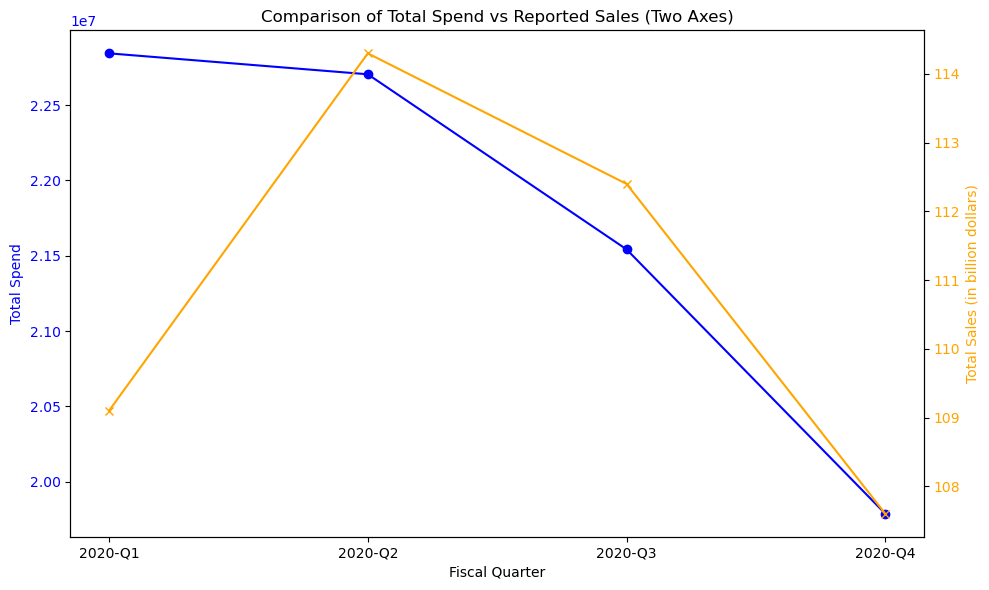

In [58]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total spend on the left y-axis
ax1.set_xlabel('Fiscal Quarter')
ax1.set_ylabel('Total Spend', color='blue')
ax1.plot(comparison_data['fiscal_quarter'], comparison_data['total_spend'], marker='o', color='blue', label='Total Spend')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot total sales on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Total Sales (in billion dollars)', color='orange')
ax2.plot(comparison_data['fiscal_quarter'], comparison_data['total_sales'], marker='x', color='orange', label='Total Sales')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Comparison of Total Spend vs Reported Sales (Two Axes)')
fig.tight_layout()
plt.show()



##### Clustering

Probability that if there is a spend value for a given month, the next month's spend value is missing: 0.027044253499536083
Probability that if a spend value is missing for a given month, the next month's spend value is also missing: 0.25282250601517675
0.045 of the data is in the test set
Imputing row 1/3593 with 0 missing, elapsed time: 2.315
Imputing row 101/3593 with 6 missing, elapsed time: 2.319
Imputing row 201/3593 with 4 missing, elapsed time: 2.323
Imputing row 301/3593 with 5 missing, elapsed time: 2.327
Imputing row 401/3593 with 7 missing, elapsed time: 2.332
Imputing row 501/3593 with 7 missing, elapsed time: 2.337
Imputing row 601/3593 with 6 missing, elapsed time: 2.340
Imputing row 701/3593 with 3 missing, elapsed time: 2.345
Imputing row 801/3593 with 3 missing, elapsed time: 2.350
Imputing row 901/3593 with 3 missing, elapsed time: 2.354
Imputing row 1001/3593 with 2 missing, elapsed time: 2.359
Imputing row 1101/3593 with 2 missing, elapsed time: 2.364
Imputing row 

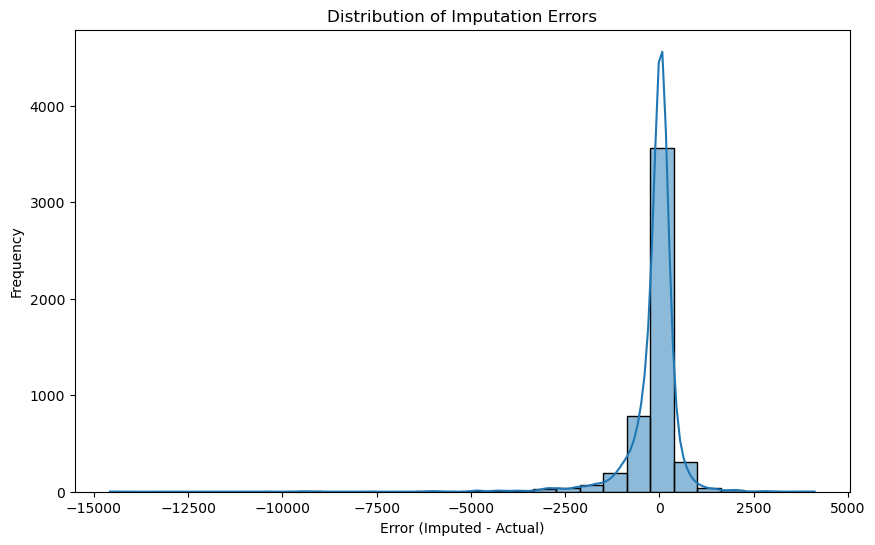

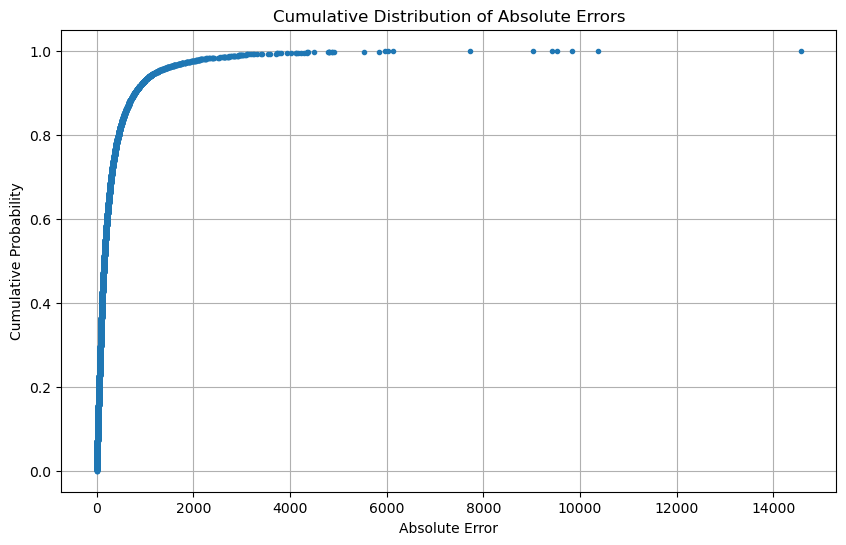

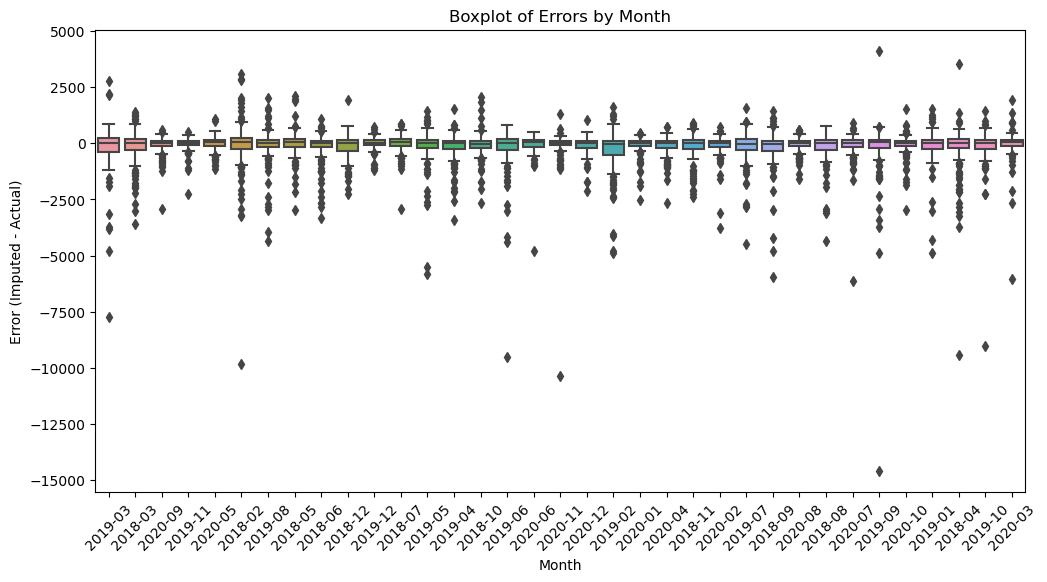

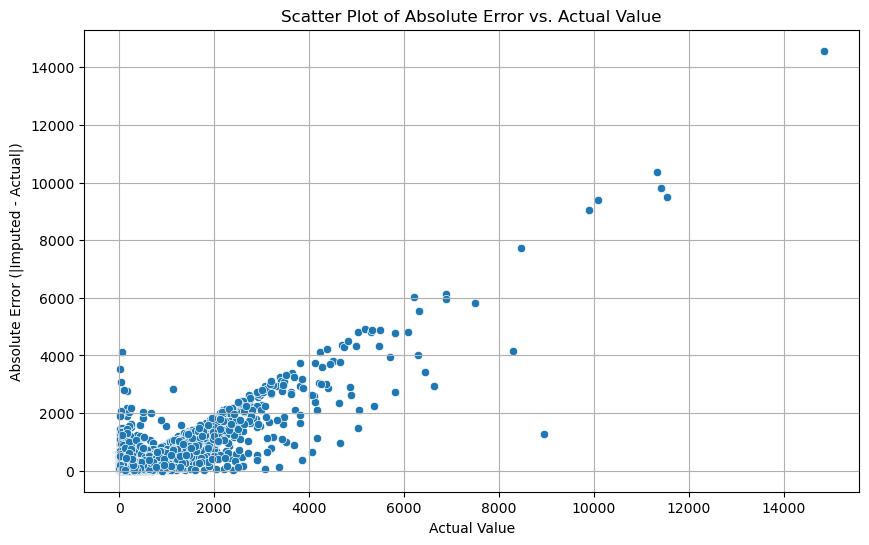

Accounts with the worst average errors:


account
a04:512:6B58E93FDBDAA6DCBA8D485D88EBF3CE    2816.767541
a04:512:D996310E4AD9C3BC9D3771DC7AA72270    2176.228759
a04:512:761BE83F1021563C4B5FD9C5EDD49B5D    1984.891263
a04:512:0D5EE0469DD889CBE1F49218E87C584F    1937.919590
a04:512:2502A16FF7CE3DED39DEE762BBE72FD4    1936.063016
a04:512:EA7A5408B85B86CE6B0ABA5AD558D4A4    1776.287144
a04:512:3CAD08C5B4AB8A76FD7399BF4375C3B1    1624.412674
a04:512:148D387C3E6AD20A0B550DEDA55BF337    1594.877924
a04:512:E0DE8853EE0302FFDD44E36DC9C32002    1575.932177
a04:512:3492A5C33936713472C4E69F57FEBA10    1539.280798
Name: error, dtype: float64

Imputing row 1/3593 with 0 missing, elapsed time: 1.955
Imputing row 101/3593 with 1 missing, elapsed time: 1.957
Imputing row 201/3593 with 1 missing, elapsed time: 1.959
Imputing row 301/3593 with 3 missing, elapsed time: 1.961
Imputing row 401/3593 with 3 missing, elapsed time: 1.963
Imputing row 501/3593 with 1 missing, elapsed time: 1.965
Imputing row 601/3593 with 4 missing, elapsed time: 1.967
Imputing row 701/3593 with 3 missing, elapsed time: 1.970
Imputing row 801/3593 with 3 missing, elapsed time: 1.972
Imputing row 901/3593 with 1 missing, elapsed time: 1.974
Imputing row 1001/3593 with 1 missing, elapsed time: 1.976
Imputing row 1101/3593 with 0 missing, elapsed time: 1.979
Imputing row 1201/3593 with 1 missing, elapsed time: 1.981
Imputing row 1301/3593 with 0 missing, elapsed time: 1.983
Imputing row 1401/3593 with 0 missing, elapsed time: 1.985
Imputing row 1501/3593 with 0 missing, elapsed time: 1.987
Imputing row 1601/3593 with 0 missing, elapsed time: 1.989
Imputing 

In [59]:
 import pandas as pd
import numpy as np
from fancyimpute import KNN  # You can replace KNN with other methods in fancyimpute if needed
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Merchants specified in Part 5
merchants = ['WALMART', 'MCDONALDS', 'AMAZON', 'APPLE', 'WENDYS', 'TACO BELL', 'BURGER KING', 'DOLLAR GENERAL']

# Filter fiscal revenue for relevant merchants using their tickers
merchant_tickers = {
    'WALMART': 'WMT',
    'MCDONALDS': 'MCD',
    'AMAZON': 'AMZN',
    'APPLE': 'AAPL',
    'WENDYS': 'WEN',
    'TACO BELL': 'YUM',
    'BURGER KING': 'QSR',
    'DOLLAR GENERAL': 'DG'
}

data = data.loc[data['merchant_ticker'].isin(merchant_tickers.values())].copy()
data['Company'] = data['merchant_ticker'].map({v: k for k, v in merchant_tickers.items()})

threshold = 10
zscore_threshold = 3

# 1. Pivot data to user/month/total dollar spend
data['date'] = data['date'].dt.tz_localize(None)
data['month'] = data['date'].dt.to_period('M')
data_grouped = data.groupby(['account', 'month'])['spend'].sum()
pivot_data = data_grouped.unstack()
data_grouped = data_grouped.reset_index()
# data_grouped columns are ["account", "month", "spend"]

# Calculate the percentage of NaN values for each account
nan_percentage_by_account = pivot_data.isnull().sum(axis=1) / pivot_data.shape[1] * 100

# Remove accounts with more than 'threshold' % NaN values
filtered_pivot_data = pivot_data[nan_percentage_by_account <= threshold]

# Remove outliers at the user/month level using z-score on log(spend)
filtered_pivot_data_stacked = filtered_pivot_data.stack().reset_index()
filtered_pivot_data_stacked.columns = ['account', 'month', 'spend']
filtered_pivot_data_stacked['log_spend'] = np.log(filtered_pivot_data_stacked['spend'] + 1)  # Adding 1 to avoid log(0)
filtered_pivot_data_stacked['zscore'] = filtered_pivot_data_stacked.groupby('account')['log_spend'].transform(lambda x: zscore(x, nan_policy='omit'))
filtered_pivot_data_stacked = filtered_pivot_data_stacked[filtered_pivot_data_stacked['zscore'].abs() <= 3]

# Drop the zscore and log_spend columns as they are no longer needed
filtered_pivot_data_stacked = filtered_pivot_data_stacked.drop(columns=['zscore', 'log_spend'])

# Transform filtered_pivot_data_stacked back to have each row being an account and each month being a column
filtered_pivot_data = filtered_pivot_data_stacked.pivot(index='account', columns='month', values='spend')

# Calculate probabilities
# 1. Probability that if there is a spend value for a given month, the next month's spend value is missing
has_spend = filtered_pivot_data.notna()
missing_next_month = has_spend.shift(-1, axis=1).isna()
prob_spend_next_missing = (has_spend & missing_next_month).sum().sum() / has_spend.sum().sum()

# 2. Probability that if a spend value is missing for a given month, the next month's spend value is also missing
is_missing = filtered_pivot_data.isna()
missing_next_month_if_missing = is_missing.shift(-1, axis=1)
prob_missing_next_missing = (is_missing & missing_next_month_if_missing).sum().sum() / is_missing.sum().sum()

print(f"Probability that if there is a spend value for a given month, the next month's spend value is missing: {prob_spend_next_missing}")
print(f"Probability that if a spend value is missing for a given month, the next month's spend value is also missing: {prob_missing_next_missing}")

# Create a test set by removing data based on calculated probabilities
test_data = filtered_pivot_data.copy()
removed_values = []
for account in test_data.index:
    for month in test_data.columns[:-1]:  # Exclude the last month since there is no next month
        if pd.notna(test_data.at[account, month]):
            # Remove value with probability prob_spend_next_missing
            if random.random() < prob_spend_next_missing:
                test_data.at[account, month + 1] = np.nan
                removed_values.append((account, month + 1))
        elif pd.isna(test_data.at[account, month]):
            # Remove value with probability prob_missing_next_missing
            if random.random() < prob_missing_next_missing:
                test_data.at[account, month + 1] = np.nan
                removed_values.append((account, month + 1))

# Track removed values
removed_values_df = pd.DataFrame(removed_values, columns=['account', 'month'])

# Show percent of values in withholding set
print(f"{np.round(len(removed_values_df)/len(filtered_pivot_data_stacked), 3)} of the data is in the test set")
# The filtered data, test set, and probabilities are now ready for further analysis or modeling

# Impute the missing data in test_data using KNN
knn_imputer = KNN()
imputed_data = knn_imputer.fit_transform(test_data)
imputed_data_df = pd.DataFrame(imputed_data, index=test_data.index, columns=test_data.columns)

# Compare imputed values with actual values
comparison_results = []
for account, month in removed_values:
    actual_value = filtered_pivot_data.at[account, month]
    imputed_value = imputed_data_df.at[account, month]
    comparison_results.append({'account': account, 'month': month, 'actual_value': actual_value, 'imputed_value': imputed_value})

comparison_df = pd.DataFrame(comparison_results).dropna(subset=['actual_value'])
comparison_df['error'] = comparison_df['imputed_value'] - comparison_df['actual_value']
comparison_df['absolute_error'] = comparison_df['error'].abs()

# Plotting the distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(comparison_df['error'], bins=30, kde=True)
plt.xlabel('Error (Imputed - Actual)')
plt.ylabel('Frequency')
plt.title('Distribution of Imputation Errors')
plt.show()

# Cumulative Error Distribution
plt.figure(figsize=(10, 6))
sorted_errors = np.sort(np.abs(comparison_df['error']))
cdf = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)
plt.plot(sorted_errors, cdf, marker='.', linestyle='none')
plt.xlabel('Absolute Error')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Absolute Errors')
plt.grid()
plt.show()

# Boxplot by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='error', data=comparison_df)
plt.xlabel('Month')
plt.ylabel('Error (Imputed - Actual)')
plt.title('Boxplot of Errors by Month')
plt.xticks(rotation=45)
plt.show()

# Scatter plot showing how absolute error changes as actual value changes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_value', y='absolute_error', data=comparison_df)
plt.xlabel('Actual Value')
plt.ylabel('Absolute Error (|Imputed - Actual|)')
plt.title('Scatter Plot of Absolute Error vs. Actual Value')
plt.grid()
plt.show()

# Identify accounts with the worst errors
worst_accounts = comparison_df.groupby('account')['error'].mean().sort_values(ascending=False).head(10)
print("Accounts with the worst average errors:")
display(worst_accounts)

# Lastly apply imputation to whole dataset using KNN
knn_imputer = KNN()
imputed_data = knn_imputer.fit_transform(filtered_pivot_data)
imputed_data_df = pd.DataFrame(imputed_data, index=filtered_pivot_data.index, columns=filtered_pivot_data.columns)

Clustering continued

/Users/srujithareddyambati/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Top 10 Merchants per Cluster:
cluster
0     [WALMART, AMAZON, MCDONALDS, DOLLAR GENERAL, A...
1     [WALMART, AMAZON, SAMS CLUB, MCDONALDS, APPLE ...
2     [WALMART, AMAZON, SAMS CLUB, MCDONALDS, APPLE,...
3     [WALMART, AMAZON, MCDONALDS, DOLLAR GENERAL, A...
4     [WALMART, AMAZON, MCDONALDS, APPLE, DOLLAR GEN...
5     [WALMART, AMAZON, SAMS CLUB, MCDONALDS, TACO B...
6     [WALMART, AMAZON, SAMS CLUB, MCDONALDS, DOLLAR...
7     [WALMART, AMAZON, APPLE PAY, MCDONALDS, DOLLAR...
8     [WALMART, AMAZON, MCDONALDS, SAMS CLUB, DOLLAR...
9     [WALMART, AMAZON, WENDYS, MCDONALDS, APPLE, AP...
10    [WALMART, AMAZON, MCDONALDS, DOLLAR GENERAL, A...
11    [WALMART, AMAZON, APPLE, MCDONALDS, APPLE PAY,...
12    [APPLE PAY, AMAZON, WALMART, APPLE, SAMS CLUB,...
13    [WALMART, AMAZON, APPLE PAY, MCDONALDS, DOLLAR...
14    [APPLE PAY, AMAZON, WALMART, SAMS CLUB, APPLE,...
dtype: object

Total Number of Users per Cluster:
11    3307
4     2138
0     1547
10    1007
3      635
8      453
6     

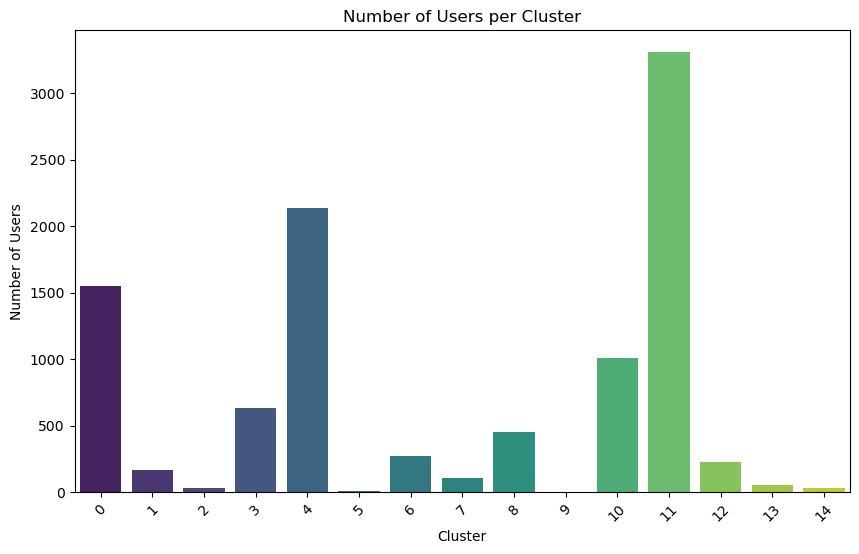

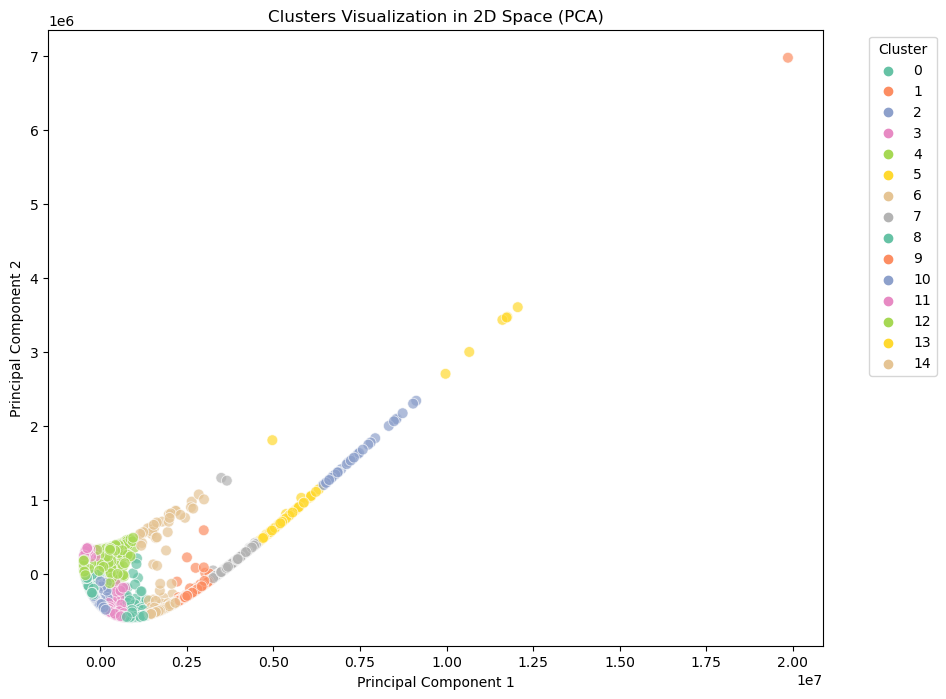

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Prepare data for clustering
# Aggregate by account and merchant to get total spend by each user at each merchant
merchant_spend = data.groupby(['account', 'merchant'])['spend'].sum().unstack(fill_value=0)

# 1. Distance Metric 1: TF-IDF on merchants
merchant_strings = data.groupby('account')['merchant_string_example'].apply(lambda x: ' '.join(map(str, x))).reset_index()
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(merchant_strings['merchant_string_example'])
tfidf_similarity = cosine_similarity(tfidf_matrix)

# 2. Distance Metric 2: Euclidean distance on spending patterns across merchants
euclidean_distance = euclidean_distances(merchant_spend)

# 3. Clustering using KMeans on chosen metric (e.g., Euclidean distance)
kmeans = KMeans(n_clusters=15, random_state=42)
clusters = kmeans.fit_predict(euclidean_distance)

# Assign clusters to accounts and analyze top merchants per cluster
merchant_spend['cluster'] = clusters
top_merchants_per_cluster = merchant_spend.groupby('cluster').sum().apply(lambda x: x.nlargest(10).index.tolist(), axis=1)

# Count users per cluster
users_per_cluster = merchant_spend['cluster'].value_counts()

# Display the results
print("Top 10 Merchants per Cluster:")
print(top_merchants_per_cluster)
print("\nTotal Number of Users per Cluster:")
print(users_per_cluster)

# 1. Bar Chart: Number of Users per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=users_per_cluster.index, y=users_per_cluster.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('Number of Users per Cluster')
plt.xticks(rotation=45)
plt.show()

# 2. PCA for Visualization in 2D Space
# Reduce the dimensions of the spending patterns for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(euclidean_distance)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Scatter plot to visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60, alpha=0.7)
plt.title('Clusters Visualization in 2D Space (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [61]:
account_cluster_map = merchant_spend.reset_index()#['index', 'cluster']
account_cluster_map = account_cluster_map[['account', 'cluster']]
data_cluster = data.merge(account_cluster_map, left_on='account', right_on='account')
cluster_spend = data_cluster.groupby(['cluster', 'fiscal_quarter']).agg({'spend': 'sum'}).reset_index()
cluster_spend_pivot = cluster_spend.pivot(index='cluster', columns='fiscal_quarter', values='spend')
cluster_spend_pivot = cluster_spend_pivot.fillna(0)
cluster_spend_pivot

fiscal_quarter,2017-4Q,2018-1Q,2018-2Q,2018-3Q,2018-4Q,2019-1Q,2019-2Q,2019-3Q,2019-4Q,2020-1Q,2020-2Q,2020-3Q,2020-4Q,2021-1Q,2021-2Q,2021-3Q,2021-4Q
cluster,,,,,,,,,,,,,,,,,
0,5190.27,144910.80,193300.35,233793.43,486869.83,1527038.28,1527435.57,1536296.72,1769372.89,2095809.89,1868153.20,1841620.87,1009158.14,915086.75,689317.63,491360.20,341788.47
1,1504.45,24997.49,28505.35,35391.36,208704.33,773356.29,756648.70,834437.85,993403.30,1202260.70,932451.69,945920.40,356870.56,327276.34,212247.96,180074.26,124134.58
2,130.69,3098.93,5370.73,7533.82,54654.89,256763.87,336693.37,399294.11,435365.48,446727.99,383776.93,371722.65,112156.09,128191.04,86137.84,67829.02,47343.30
3,3741.44,80885.45,101937.23,116578.18,331456.62,1301288.05,1279266.21,1298491.29,1489828.99,1888504.30,1425876.68,1485834.86,651214.73,735602.31,507325.19,398740.62,269974.45
4,5375.24,158098.02,238058.73,266147.99,483694.04,1210092.37,1237109.16,1251734.16,1453760.38,1642417.52,1579600.28,1538482.81,940071.16,806045.09,584367.81,382415.07,285712.58
5,0.00,1528.04,1262.25,2671.49,16792.11,63685.93,94267.87,99302.58,121826.92,122277.22,115054.12,111078.16,38577.03,34784.79,17788.03,25113.70,17720.92
6,1726.90,42065.40,53707.85,58002.64,238120.28,1055299.97,949859.62,1108052.50,1168580.57,1350176.76,1081225.14,1125926.47,463358.73,481169.80,298133.22,267476.22,170724.13
7,324.70,17990.61,21013.73,25181.05,142861.77,630955.75,604985.43,677070.29,739137.04,969262.57,726951.62,735083.14,259842.76,289904.62,177640.08,150149.45,90153.63
8,1626.11,58317.33,76996.59,91360.40,281585.98,1355071.76,1166860.88,1271332.12,1359202.56,1899895.22,1472754.41,1386290.94,559012.74,637381.97,451895.89,331090.51,202161.70


In [62]:
company_revenue = data.groupby(['Company', 'fiscal_quarter']).agg({'kpivalue': 'sum'}).reset_index()
company_revenue_pivot = company_revenue.pivot(index='Company', columns='fiscal_quarter', values='kpivalue')
company_revenue_pivot

fiscal_quarter,2017-4Q,2018-1Q,2018-2Q,2018-3Q,2018-4Q,2019-1Q,2019-2Q,2019-3Q,2019-4Q,2020-1Q,2020-2Q,2020-3Q,2020-4Q,2021-1Q,2021-2Q,2021-3Q,2021-4Q
Company,,,,,,,,,,,,,,,,,
AMAZON,NaN,1.484325e+08,2.057208e+08,2.626592e+08,3.976896e+08,3.669298e+08,3.894290e+08,4.529861e+08,6.354410e+08,5.995587e+08,8.666310e+08,8.898232e+08,1.080311e+09,NaN,NaN,NaN,NaN
APPLE,NaN,NaN,2.651512e+08,3.342911e+08,4.970358e+08,7.278482e+08,5.312434e+08,5.277587e+08,6.759422e+08,1.041319e+09,7.047126e+08,7.875436e+08,8.583484e+08,1.335151e+09,NaN,NaN,NaN
DOLLAR GENERAL,5155933.068,2.116512e+07,3.069185e+07,3.275321e+07,3.364445e+07,3.465066e+07,3.749362e+07,3.665013e+07,3.746502e+07,4.197775e+07,3.763863e+07,3.136339e+07,2.377769e+07,NaN,NaN,NaN,NaN
MCDONALDS,NaN,8.255552e+07,1.261142e+08,1.465866e+08,1.440717e+08,1.386494e+08,1.561166e+08,1.534489e+08,1.520148e+08,1.388195e+08,1.322185e+08,1.450269e+08,1.334211e+08,NaN,NaN,NaN,NaN
TACO BELL,NaN,9.584661e+06,1.272787e+07,1.522310e+07,1.739819e+07,1.482103e+07,1.520255e+07,1.481202e+07,1.788525e+07,1.392584e+07,1.373148e+07,1.475222e+07,1.550921e+07,NaN,NaN,NaN,NaN
WALMART,NaN,NaN,NaN,NaN,5.395018e+08,2.151181e+09,2.960331e+09,3.046413e+09,3.491562e+09,3.151272e+09,3.238867e+09,3.160312e+09,1.632735e+09,1.710433e+09,1.666483e+09,1.392532e+09,1.033450e+09
WENDYS,NaN,4.434167e+06,6.034005e+06,6.954212e+06,6.990765e+06,7.641680e+06,7.447872e+06,7.708514e+06,7.486805e+06,7.425491e+06,6.584610e+06,7.010164e+06,6.480442e+06,NaN,NaN,NaN,NaN


In [63]:
from fancyimpute import KNN

knn_imputer = KNN(orientation='columns')
imputed_data = knn_imputer.fit_transform(company_revenue_pivot)
imputed_data_df = pd.DataFrame(imputed_data, index=company_revenue_pivot.index, columns=company_revenue_pivot.columns)

company_revenue_pivot = imputed_data_df.reset_index()

knn_imputer = KNN(orientation='columns')
imputed_data = knn_imputer.fit_transform(cluster_spend_pivot)
imputed_data_df = pd.DataFrame(imputed_data, index=cluster_spend_pivot.index, columns=cluster_spend_pivot.columns)

cluster_spend_pivot = imputed_data_df.reset_index()

Imputing row 1/17 with 6 missing, elapsed time: 0.001
Imputing row 1/17 with 0 missing, elapsed time: 0.000


/Users/srujithareddyambati/anaconda3/lib/python3.11/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [64]:
cluster_spend_pivot = cluster_spend_pivot[['cluster', 
                                           '2018-2Q',
                                           '2018-3Q',
                                           '2018-4Q',
                                           '2019-1Q',
                                           '2019-2Q',
                                           '2019-3Q',
                                           '2019-4Q',
                                           '2020-1Q',
                                           '2020-2Q',
                                           '2020-3Q',
                                           '2020-4Q',
                                          ]]

company_revenue_pivot = company_revenue_pivot[['Company', 
                                               '2018-2Q',
                                               '2018-3Q',
                                               '2018-4Q',
                                               '2019-1Q',
                                               '2019-2Q',
                                               '2019-3Q',
                                               '2019-4Q',
                                               '2020-1Q',
                                               '2020-2Q',
                                               '2020-3Q',
                                               '2020-4Q']]

 This code implements a constrained regression model to map clusters (spending data) to companies (revenue data) on a per-quarter basis, using a Mean Absolute Percentage Error (MAPE) loss function. It normalizes the input (spend) and output (revenue) data, optimizes weights for the regression using the L-BFGS-B method under specific bounds, and rescales predictions back to the original scale. Finally, it evaluates the model's performance by calculating the rescaled MAPE for training data.

In [65]:
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Align columns (fiscal quarters) between the two datasets
common_columns = set(cluster_spend_pivot.columns[1:]).intersection(company_revenue_pivot.columns[1:])
cluster_spend_pivot = cluster_spend_pivot[['cluster'] + list(common_columns)]
company_revenue_pivot = company_revenue_pivot[['Company'] + list(common_columns)]

# Fill missing values with zeros
cluster_spend_pivot_filled = cluster_spend_pivot.fillna(0)
company_revenue_pivot_filled = company_revenue_pivot.fillna(0)

# Extract numeric data
X = cluster_spend_pivot_filled.iloc[:, 1:].values  # Exclude 'cluster' column
y = company_revenue_pivot_filled.iloc[:, 1:].values  # Exclude 'Company' column

# Normalize inputs (X) and outputs (y)
input_scaler = StandardScaler() #MinMaxScaler()
output_scaler = StandardScaler() #MinMaxScaler()

X_normalized = input_scaler.fit_transform(X)
y_normalized = output_scaler.fit_transform(y.T).T  # Normalize each company's data

# Define the constrained regression function
def constrained_regression_improved(X, y):
    """
    Perform regression quarter by quarter, mapping clusters (rows of X) to companies (rows of y),
    """
    n_clusters, n_quarters = X.shape
    n_companies = y.shape[0]

    optimized_weights = []
    np.random.seed(42)

    for i in range(n_quarters):
        # Extract the ith column for regression (single fiscal quarter)
        X_col = X[:, i].reshape(-1, 1)  # (15, 1)
        y_col = y[:, i]  # (7,)

        # Define the objective function: minimize MAPE
        def mape_loss(weights, X_col, y_col):
            weights = weights.reshape(-1, n_companies)  # Reshape weights to (15, 7)
            predictions = X_col.T @ weights  # Weighted sum: (1, 15) x (15, 7) = (1, 7)
            mape = np.mean(np.abs((y_col - predictions.flatten()) / (np.maximum(y_col, 1e-3))))  # Adjust denominator
            return mape

        # Constraints: weights must lie within 0 to 10 (wider range for normalized data)
        bounds = [(1, 15) for _ in range(n_clusters * n_companies)]

        # Initial weights
        initial_weights = np.random.uniform(0, 10, size=n_clusters * n_companies)

        # Minimize MAPE
        result = minimize(
            fun=mape_loss,
            x0=initial_weights,
            args=(X_col, y_col),
            bounds=bounds,
            method="L-BFGS-B",
        )

        # Reshape weights for the current quarter and append
        optimized_weights.append(result.x.reshape(n_clusters, n_companies))

    # Return the optimized weights for all quarters
    return np.array(optimized_weights)  # Shape: (n_quarters, n_clusters, n_companies)

# Fit the constrained regression model
optimized_weights_normalized = constrained_regression_improved(X_normalized, y_normalized)

# Make predictions on normalized data
predictions_normalized = np.array([
    (X_normalized[:, i].reshape(-1, 1).T @ optimized_weights_normalized[i]).flatten()
    for i in range(X_normalized.shape[1])
]).T

# Rescale predictions back to the original scale
predictions_rescaled = np.abs(output_scaler.inverse_transform(predictions_normalized.T).T)

# Calculate MAPE on the rescaled predictions
mape_train_rescaled = np.mean(np.abs((y - predictions_rescaled) / (y + 1e-3))) * 100

# Display the results
print("Final Training MAPE (Rescaled):", mape_train_rescaled)
print("Optimized Weights Shape:", optimized_weights_normalized.shape)



Final Training MAPE (Rescaled): 32.15657947185095
Optimized Weights Shape: (11, 15, 7)


###### display optimized weights

In [66]:
quarters = ['2018-2Q', '2018-3Q', '2018-4Q', '2019-1Q', '2019-2Q', 
            '2019-3Q', '2019-4Q', '2020-1Q', '2020-2Q', '2020-3Q', '2020-4Q']
clusters = [f'Cluster {i+1}' for i in range(15)]
companies = ['AMAZON', 'APPLE', 'DOLLAR GENERAL', 'MCDONALDS', 
             'TACO BELL', 'WALMART', 'WENDYS']  

# Flatten the 3D array and prepare a multi-index DataFrame
data = []

# Loop through all quarters, clusters, and companies to flatten the data
for q_idx, quarter in enumerate(quarters):
    for c_idx, cluster in enumerate(clusters):
        for comp_idx, company in enumerate(companies):
            weight = round(optimized_weights_normalized[q_idx, c_idx, comp_idx], 2)  # Round to 2 decimals
            data.append([quarter, cluster, company, weight])

# Create the DataFrame
weights_df = pd.DataFrame(data, columns=['Quarter', 'Cluster', 'Company', 'Weight'])

# Display the DataFrame
print("Optimized Weights DataFrame (Rounded to 2 Decimal Places):")
display(weights_df)

# Save as CSV 
weights_df.to_csv('optimized_weights_rounded.csv', index=False)




Optimized Weights DataFrame (Rounded to 2 Decimal Places):


,Quarter,Cluster,Company,Weight
0,2018-2Q,Cluster 1,AMAZON,4.31
1,2018-2Q,Cluster 1,APPLE,9.67
2,2018-2Q,Cluster 1,DOLLAR GENERAL,7.60
3,2018-2Q,Cluster 1,MCDONALDS,5.96
4,2018-2Q,Cluster 1,TACO BELL,1.69
...,...,...,...,...
1150,2020-4Q,Cluster 15,DOLLAR GENERAL,7.92
1151,2020-4Q,Cluster 15,MCDONALDS,8.40
1152,2020-4Q,Cluster 15,TACO BELL,7.28
1153,2020-4Q,Cluster 15,WALMART,6.78


###### Display MAPE for each company quarter

In [67]:
# Ensure arrays are 1D and of the same length
y_flat = y.ravel()
predictions_flat = predictions_rescaled.ravel()

# Validate array lengths
assert len(y_flat) == len(predictions_flat), "Mismatch in y and predictions_rescaled lengths."

# Adjust Company and Quarter assignments to match data length
total_entries = len(y_flat)
data = {
    'Company': np.tile(companies, total_entries // len(companies) + 1)[:total_entries],
    'Year-Quarter': np.repeat(quarters, len(companies))[:total_entries],
    'Revenue': np.round(y_flat, 2),
    'Prediction': np.round(predictions_flat, 2),
    'MAPE (%)': np.round(np.abs((y_flat - predictions_flat) / (y_flat + 1e-3)) * 100, 2)
}

# Create DataFrame
result_df = pd.DataFrame(data)

# Display the table
print(result_df)

# Calculate and display Total MAPE
total_mape = result_df['MAPE (%)'].mean()
print(f"\nTotal MAPE: {total_mape:.2f}%")
#save as csv for analysis
result_df.to_csv('results.csv', index = False)

           Company Year-Quarter       Revenue    Prediction  MAPE (%)
0           AMAZON      2018-2Q  2.626592e+08  2.626593e+08      0.00
1            APPLE      2018-2Q  2.057208e+08  2.057208e+08      0.00
2   DOLLAR GENERAL      2018-2Q  3.894290e+08  3.799612e+08      2.43
3        MCDONALDS      2018-2Q  5.995587e+08  1.760779e+08     70.63
4        TACO BELL      2018-2Q  8.666310e+08  1.033616e+09     19.27
5          WALMART      2018-2Q  1.080311e+09  5.121755e+08     52.59
6           WENDYS      2018-2Q  6.354410e+08  6.354410e+08      0.00
7           AMAZON      2018-3Q  3.669298e+08  3.669298e+08      0.00
8            APPLE      2018-3Q  4.529861e+08  4.537633e+08      0.17
9   DOLLAR GENERAL      2018-3Q  3.976896e+08  3.976896e+08      0.00
10       MCDONALDS      2018-3Q  8.898232e+08  9.877833e+08     11.01
11       TACO BELL      2018-3Q  3.342911e+08  3.342911e+08      0.00
12         WALMART      2018-3Q  2.651512e+08  2.651512e+08      0.00
13          WENDYS  